<a href="https://colab.research.google.com/github/Sharath-gbr/handson-ml/blob/master/LoanTapData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logistic_regression.csv')
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8281 entries, 0 to 8280
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             8281 non-null   float64
 1   term                  8281 non-null   object 
 2   int_rate              8281 non-null   float64
 3   installment           8281 non-null   float64
 4   grade                 8281 non-null   object 
 5   sub_grade             8281 non-null   object 
 6   emp_title             7795 non-null   object 
 7   emp_length            7893 non-null   object 
 8   home_ownership        8281 non-null   object 
 9   annual_inc            8281 non-null   float64
 10  verification_status   8281 non-null   object 
 11  issue_d               8280 non-null   object 
 12  loan_status           8280 non-null   object 
 13  purpose               8280 non-null   object 
 14  title                 8246 non-null   object 
 15  dti                  

In [4]:
data.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title               486
emp_length              388
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   1
loan_status               1
purpose                   1
title                    35
dti                       1
earliest_cr_line          1
open_acc                  1
pub_rec                   1
revol_bal                 1
revol_util                5
total_acc                 1
initial_list_status       1
application_type          1
mort_acc                749
pub_rec_bankruptcies      8
address                   1
dtype: int64

In [5]:
#Chek the percentage of missing values per column
def perc_check(df):
    count = df.count()
    count_na = df.isnull().sum()
    check = (count_na/count)*100
    return check

check = pd.DataFrame(data.apply(perc_check,axis=0))
check['columns'] = check.index
check.reset_index(drop=True, inplace=True)
check.rename(columns={0: 'missing_perc'}, inplace=True)


In [6]:
drop_columns = check[check['missing_perc'] < 4.0]['columns'].tolist()
impute_columns = check[check['missing_perc'] >= 4.0]['columns'].tolist()
drop_columns

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'dti',
 'earliest_cr_line',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'application_type',
 'pub_rec_bankruptcies',
 'address']

In [7]:
impute_columns

['emp_title', 'emp_length', 'mort_acc']

In [8]:

data_clean = data.dropna(subset=['loan_amnt',
                                'term',
                                'int_rate',
                                'installment',
                                'grade',
                                'sub_grade',
                                'home_ownership',
                                'annual_inc',
                                'verification_status',
                                'issue_d',
                                'loan_status',
                                'purpose',
                                'title',
                                'dti',
                                'earliest_cr_line',
                                'open_acc',
                                'pub_rec',
                                'revol_bal',
                                'revol_util',
                                'total_acc',
                                'initial_list_status',
                                'application_type',
                                'pub_rec_bankruptcies',
                                'address'])

In [9]:
for i in impute_columns:
  print(data_clean[i].value_counts())
  print("--------------------------------")

emp_title
Teacher                            92
Manager                            84
RN                                 46
Supervisor                         38
Registered Nurse                   34
                                   ..
Phillips wine and spirits           1
BJ's Wholesale Club                 1
Target & Public Storage(2 jobs)     1
Information Technology Manager      1
managing director                   1
Name: count, Length: 5805, dtype: int64
--------------------------------
emp_length
10+ years    2634
2 years       756
< 1 year      664
3 years       650
5 years       547
1 year        518
4 years       473
6 years       463
7 years       418
8 years       385
9 years       342
Name: count, dtype: int64
--------------------------------
mort_acc
0.0     3014
1.0     1289
2.0     1017
3.0      753
4.0      552
5.0      346
6.0      255
7.0      120
8.0       86
9.0       27
10.0      19
12.0       8
11.0       7
13.0       1
14.0       1
Name: count, dtype: int64
-

## Observations
    - emp_title - This is categorical with high cardinality with 5833 unique records
    - emp_title - Categorical with low cardinality 11
    - mort_acc - Categorical with low cardinality 11
# Dealing with missing values
  - From the code below, for iteration 1, all rows with null values will be dropped since the percentage of null values does not greatly exceed 5% of the total count

  - emp_title,emp_length and mort_acc have values close to 5% and we can impute the values by using statistics such as mode or  freequency for these categories

  - we can also apply a knn imputation and re run the pipeline to see if the model's performance improves
  


In [10]:
data_knn = data.copy()
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_knn['emp_titel_le'] = le.fit_transform(data['emp_title'])
data_knn['emp_length_le'] = le.fit_transform(data['emp_length'])
data_knn['mort_acc_le'] = le.fit_transform(data['mort_acc'])

impute_knn = KNNImputer(n_neighbors=3)
data_knn[['emp_title','emp_length','mort_acc']] = impute_knn.fit_transform(data_knn[['emp_titel_le','emp_length_le','mort_acc_le']])
data_knn

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_titel_le,emp_length_le,mort_acc_le
0,10000.0,36 months,11.44,329.48,B,B4,2700.0,1.0,RENT,117000.0,...,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",2700,1,0
1,8000.0,36 months,11.99,265.68,B,B5,1102.0,4.0,MORTGAGE,65000.0,...,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1102,4,3
2,15600.0,36 months,10.49,506.97,B,B3,4289.0,10.0,RENT,43057.0,...,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",4289,10,0
3,7200.0,36 months,6.49,220.65,A,A2,890.0,6.0,RENT,54000.0,...,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",890,6,0
4,24375.0,60 months,17.27,609.33,C,C5,1296.0,9.0,MORTGAGE,55000.0,...,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",1296,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8276,12000.0,36 months,16.00,421.89,E,E2,1622.0,10.0,RENT,50004.0,...,67.0,17.0,f,INDIVIDUAL,15.0,0.0,"0987 Jackson Flats Apt. 524\r\nKeyhaven, SC 70466",1622,10,15
8277,5375.0,36 months,11.99,178.51,B,B3,3805.0,1.0,OWN,55000.0,...,27.2,45.0,f,INDIVIDUAL,0.0,0.0,"54147 Sarah Stravenue\r\nStokesborough, PA 48052",3805,1,0
8278,20000.0,36 months,11.67,661.14,B,B4,122.0,6.0,MORTGAGE,59000.0,...,27.0,17.0,w,INDIVIDUAL,1.0,0.0,"9081 Jose Way\r\nDeleonburgh, HI 48052",122,6,1
8279,21000.0,36 months,10.99,687.42,B,B4,5426.0,8.0,RENT,800000.0,...,73.0,39.0,w,INDIVIDUAL,1.0,0.0,"3149 Campbell Port\r\nMarcusfurt, OK 00813",5426,8,1


In [11]:
data_knn = data_knn.dropna(subset=['loan_amnt',
                                'term',
                                'int_rate',
                                'installment',
                                'grade',
                                'sub_grade',
                                'home_ownership',
                                'annual_inc',
                                'verification_status',
                                'issue_d',
                                'loan_status',
                                'purpose',
                                'title',
                                'dti',
                                'earliest_cr_line',
                                'open_acc',
                                'pub_rec',
                                'revol_bal',
                                'revol_util',
                                'total_acc',
                                'initial_list_status',
                                'application_type',
                                'pub_rec_bankruptcies',
                                'address'])

data_knn.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
emp_titel_le            0
emp_length_le           0
mort_acc_le             0
dtype: int64

In [12]:
data_clean = data_clean.dropna(subset= ['emp_title', 'emp_length', 'mort_acc'])
data_clean.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [13]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7062 entries, 0 to 8279
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             7062 non-null   float64
 1   term                  7062 non-null   object 
 2   int_rate              7062 non-null   float64
 3   installment           7062 non-null   float64
 4   grade                 7062 non-null   object 
 5   sub_grade             7062 non-null   object 
 6   emp_title             7062 non-null   object 
 7   emp_length            7062 non-null   object 
 8   home_ownership        7062 non-null   object 
 9   annual_inc            7062 non-null   float64
 10  verification_status   7062 non-null   object 
 11  issue_d               7062 non-null   object 
 12  loan_status           7062 non-null   object 
 13  purpose               7062 non-null   object 
 14  title                 7062 non-null   object 
 15  dti                   7062

# Handling Data Types

In [14]:
unique = pd.DataFrame()
for i in data_clean.columns:
  unique.loc[i, 'column'] = i  # Changed iloc to loc
  unique.loc[i, 'unique_count'] = data[i].nunique()
  # print(i, data[i].nunique())
unique.reset_index(drop=True, inplace=True)
unique

,column,unique_count
0,loan_amnt,833.0
1,term,2.0
2,int_rate,380.0
3,installment,5511.0
4,grade,7.0
5,sub_grade,35.0
6,emp_title,5833.0
7,emp_length,11.0
8,home_ownership,3.0
9,annual_inc,1312.0


**From the unique counts we can identify the categorical columns and convert their data type to 'categorical'. Issue_d will be the categorical column with the highest cardinality hence we can convert all the columns data types whose unique count is below or equal to this**


In [15]:
data_clean['issue_d'].unique()

array(['Jan-2015', 'Nov-2014', 'Apr-2013', 'Sep-2015', 'Sep-2012',
       'Oct-2014', 'Apr-2012', 'Jun-2013', 'May-2014', 'Dec-2015',
       'Apr-2015', 'Oct-2012', 'Jul-2014', 'Feb-2013', 'Oct-2015',
       'Jan-2014', 'Mar-2016', 'Apr-2014', 'Jun-2014', 'Oct-2013',
       'May-2013', 'Feb-2015', 'Jun-2015', 'Mar-2013', 'Jun-2016',
       'Mar-2014', 'Nov-2013', 'Dec-2014', 'Sep-2013', 'May-2016',
       'Jul-2015', 'Jul-2013', 'Aug-2013', 'Aug-2014', 'Dec-2013',
       'Mar-2012', 'Mar-2015', 'Jul-2012', 'Feb-2014', 'Dec-2012',
       'Sep-2014', 'Nov-2012', 'Apr-2016', 'Nov-2015', 'May-2012',
       'Jun-2012', 'Aug-2012', 'May-2015', 'Oct-2016', 'Aug-2015',
       'Jul-2016', 'Feb-2016', 'Aug-2016', 'Jan-2013', 'Jan-2016',
       'Nov-2016', 'Dec-2016', 'Sep-2016'], dtype=object)

In [16]:
data_cat_convert = unique[unique['unique_count'] < 110.0]['column'].to_list()
data_cat_convert

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'open_acc',
 'pub_rec',
 'total_acc',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies']

In [17]:

for column in data_cat_convert:
  data_clean[column] = data_clean[column].astype('category')

data_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7062 entries, 0 to 8279
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             7062 non-null   float64 
 1   term                  7062 non-null   category
 2   int_rate              7062 non-null   float64 
 3   installment           7062 non-null   float64 
 4   grade                 7062 non-null   category
 5   sub_grade             7062 non-null   category
 6   emp_title             7062 non-null   object  
 7   emp_length            7062 non-null   category
 8   home_ownership        7062 non-null   category
 9   annual_inc            7062 non-null   float64 
 10  verification_status   7062 non-null   category
 11  issue_d               7062 non-null   category
 12  loan_status           7062 non-null   category
 13  purpose               7062 non-null   category
 14  title                 7062 non-null   object  
 15  dti      

In [18]:
categorical_features = data_clean.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = data_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [19]:
categorical_features

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'earliest_cr_line',
 'open_acc',
 'pub_rec',
 'total_acc',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies',
 'address']

In [20]:
numerical_features

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'revol_bal',
 'revol_util']

# Exploratory Data Analysis
  Univariate Analysis

In [21]:
data_clean[numerical_features].describe()

,loan_amnt,int_rate,installment,annual_inc,dti,revol_bal,revol_util
count,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000
mean,14502.187766,13.792382,445.150246,74933.189562,17.654778,16102.614557,54.312787
std,8306.555515,4.496000,248.759375,47629.057754,8.080796,19341.098714,24.023451
min,1000.000000,5.320000,30.650000,10000.000000,0.000000,0.000000,0.000000
25%,8000.000000,10.750000,266.880000,47000.000000,11.570000,6228.500000,36.900000
50%,12375.000000,13.350000,392.810000,65000.000000,17.045000,11269.000000,55.500000
75%,20000.000000,16.590000,581.580000,90000.000000,23.250000,19719.750000,73.200000
max,40000.000000,28.990000,1533.810000,900000.000000,48.560000,382666.000000,113.000000


<Axes: xlabel='loan_status', ylabel='count'>

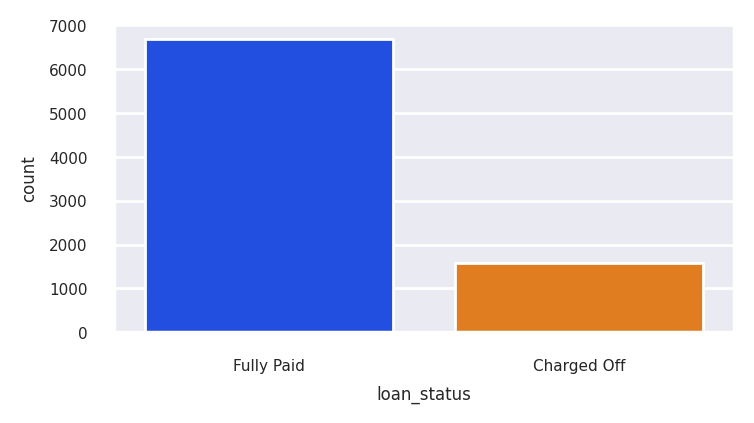

In [22]:
plt.figure(figsize=(4,2),dpi=200,edgecolor='black')
sns.set(font_scale = 0.5)
sns.barplot(data['loan_status'].value_counts(),palette='bright')


**Loan Status is the predictor variable and we can see that data is imbalanced hence we will need to perform SMOTE to balance the data**

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'revol_bal',
 'revol_util']

Univariate analysis for feature: loan_amnt


<Figure size 800x400 with 0 Axes>

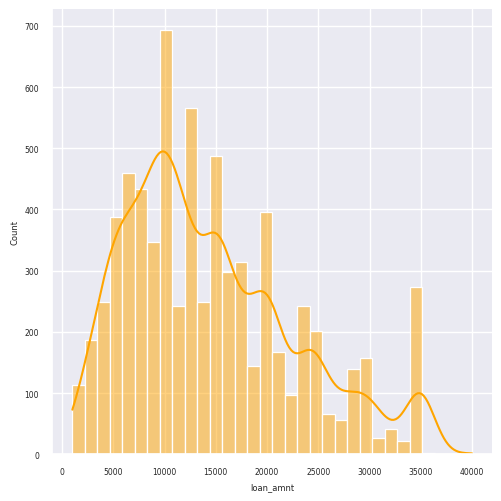

count     7062.000000
mean     14502.187766
std       8306.555515
min       1000.000000
25%       8000.000000
50%      12375.000000
75%      20000.000000
max      40000.000000
Name: loan_amnt, dtype: float64


Univariate analysis for feature: int_rate


<Figure size 800x400 with 0 Axes>

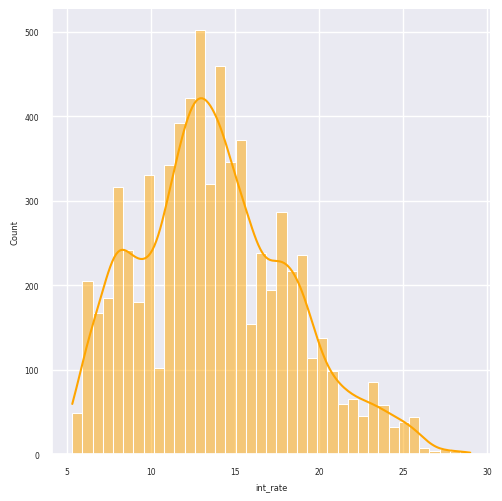

count    7062.000000
mean       13.792382
std         4.496000
min         5.320000
25%        10.750000
50%        13.350000
75%        16.590000
max        28.990000
Name: int_rate, dtype: float64


Univariate analysis for feature: installment


<Figure size 800x400 with 0 Axes>

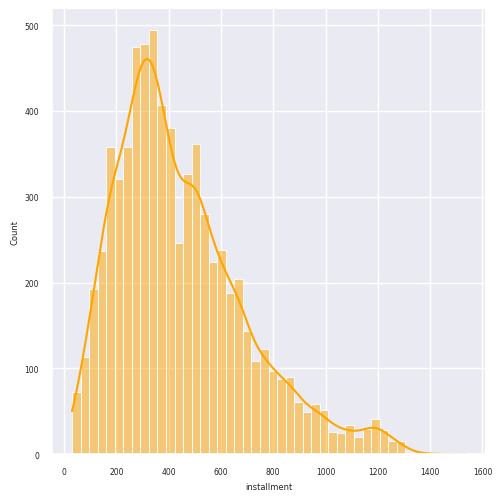

count    7062.000000
mean      445.150246
std       248.759375
min        30.650000
25%       266.880000
50%       392.810000
75%       581.580000
max      1533.810000
Name: installment, dtype: float64


Univariate analysis for feature: annual_inc


<Figure size 800x400 with 0 Axes>

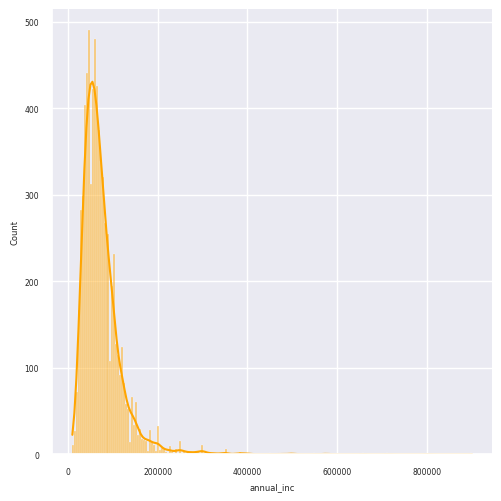

count      7062.000000
mean      74933.189562
std       47629.057754
min       10000.000000
25%       47000.000000
50%       65000.000000
75%       90000.000000
max      900000.000000
Name: annual_inc, dtype: float64


Univariate analysis for feature: dti


<Figure size 800x400 with 0 Axes>

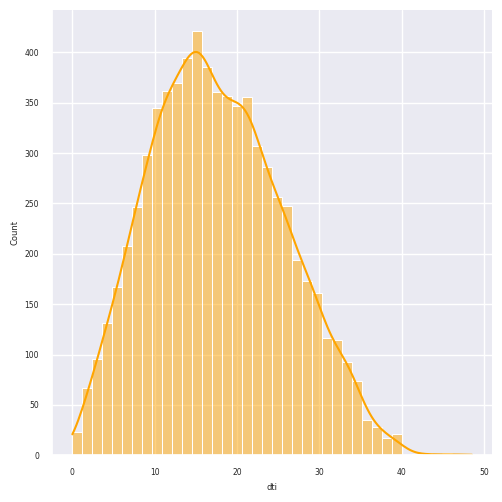

count    7062.000000
mean       17.654778
std         8.080796
min         0.000000
25%        11.570000
50%        17.045000
75%        23.250000
max        48.560000
Name: dti, dtype: float64


Univariate analysis for feature: revol_bal


<Figure size 800x400 with 0 Axes>

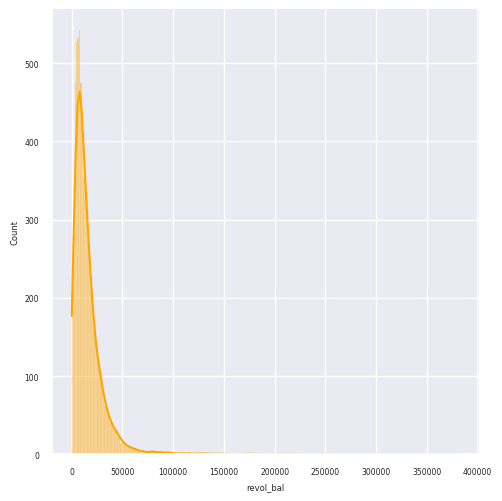

count      7062.000000
mean      16102.614557
std       19341.098714
min           0.000000
25%        6228.500000
50%       11269.000000
75%       19719.750000
max      382666.000000
Name: revol_bal, dtype: float64


Univariate analysis for feature: revol_util


<Figure size 800x400 with 0 Axes>

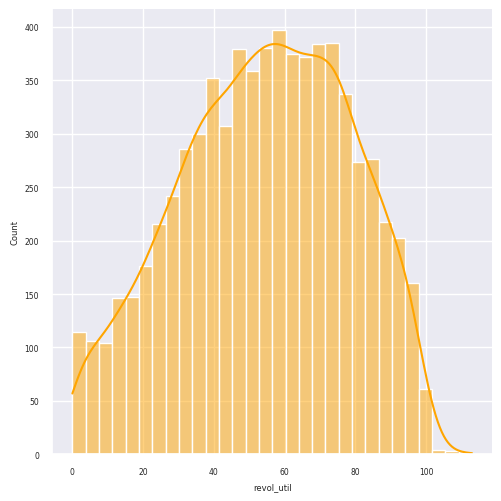

count    7062.000000
mean       54.312787
std        24.023451
min         0.000000
25%        36.900000
50%        55.500000
75%        73.200000
max       113.000000
Name: revol_util, dtype: float64




In [23]:
for feature in numerical_features:
    # Print the feature name
    print(f"Univariate analysis for feature: {feature}")

    # Plot the distribution of the feature
    plt.figure(figsize=(4, 2), dpi=200, edgecolor='black')
    sns.set(font_scale=0.5)
    sns.displot(data_clean[feature], palette='plasma',kde=True,color='orange')
    plt.show()

    # Print the descriptive statistics of the feature
    print(data_clean[feature].describe())
    print("\n")


Observations for numercial features
  - All of the numerical features are relatively gaussian with a skewness towards the right
  - This can be adjusted by using a log transformation if necessary
  

Univaraite analysis of categorical features

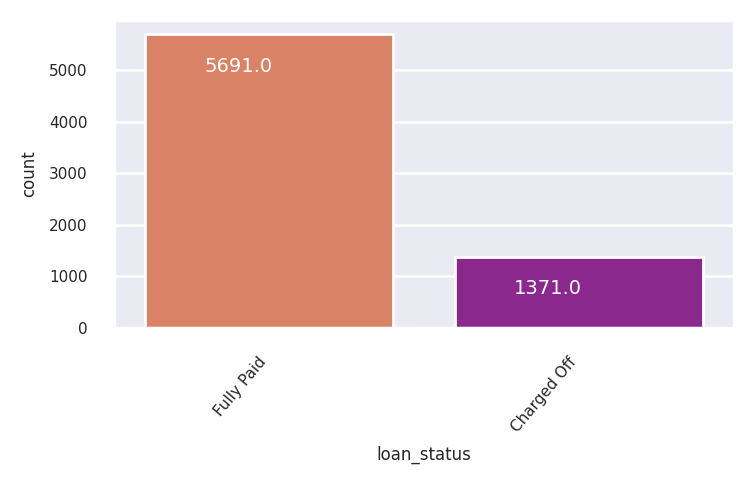

In [24]:
plt.figure(figsize=(4, 2), dpi=200, edgecolor='black')
sns.set(font_scale=0.5)
ax1 = sns.countplot(data=data_clean,
                      x=data_clean['loan_status'],
                      order=data_clean['loan_status'].value_counts().iloc[:].index,
                      hue=data_clean['loan_status'],
                      palette='plasma')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=50,horizontalalignment='right')
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='white', size=7)


In [25]:
#Removing some categories which have high cardinality making them difficult to visualize and are also not very quantifiable
cat = categorical_features.copy()
removes = ['emp_title','emp_length','issue_d','title','earliest_cr_line','open_acc','pub_rec','total_acc','address']
for x in removes:
  cat.remove(x)
cat

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies']

Univariate analysis for feature: term


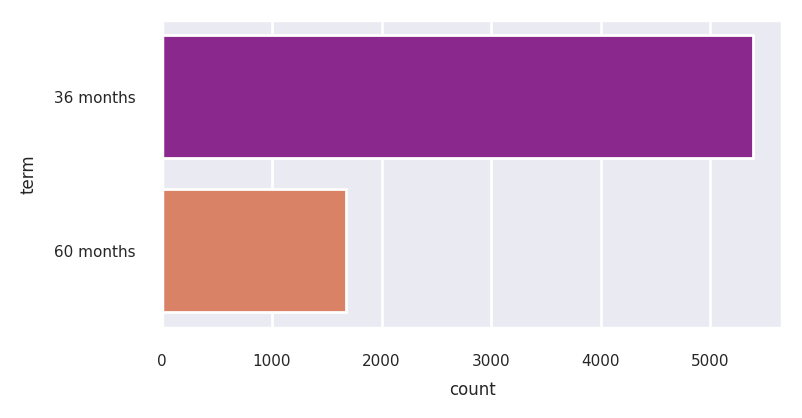

count           7062
unique             2
top        36 months
freq            5386
Name: term, dtype: object


Univariate analysis for feature: grade


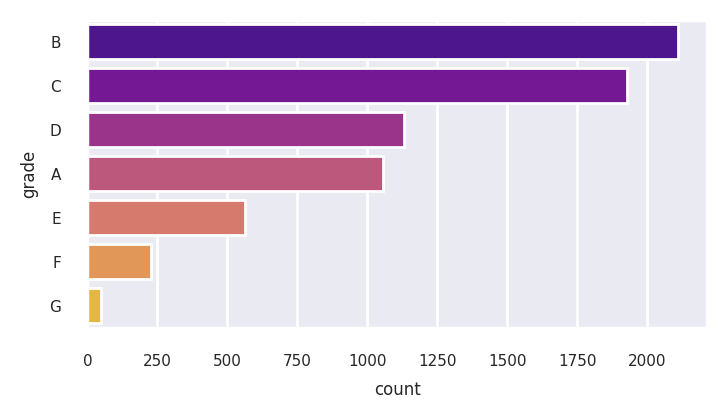

count     7062
unique       7
top          B
freq      2109
Name: grade, dtype: object


Univariate analysis for feature: sub_grade


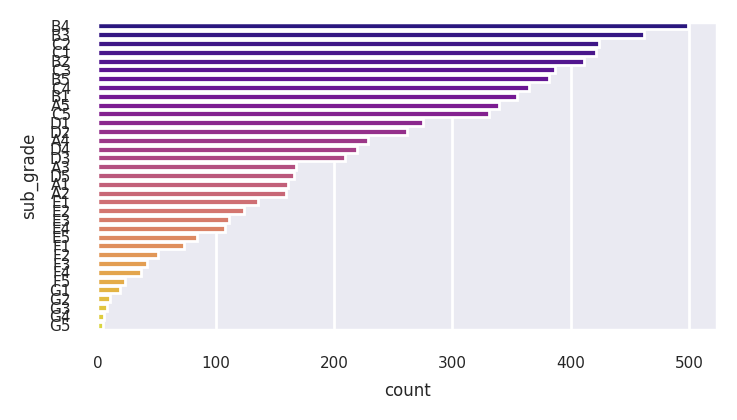

count     7062
unique      35
top         B4
freq       499
Name: sub_grade, dtype: object


Univariate analysis for feature: home_ownership


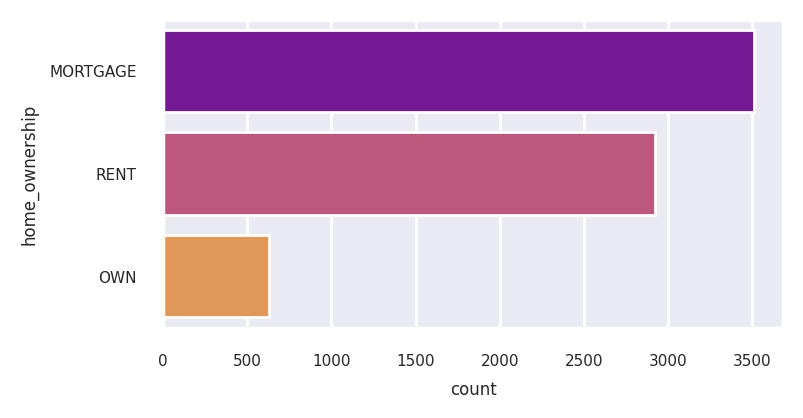

count         7062
unique           3
top       MORTGAGE
freq          3510
Name: home_ownership, dtype: object


Univariate analysis for feature: verification_status


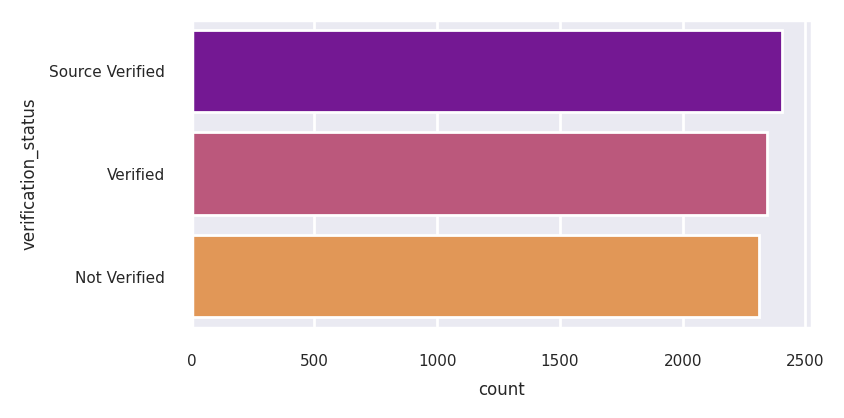

count                7062
unique                  3
top       Source Verified
freq                 2405
Name: verification_status, dtype: object


Univariate analysis for feature: loan_status


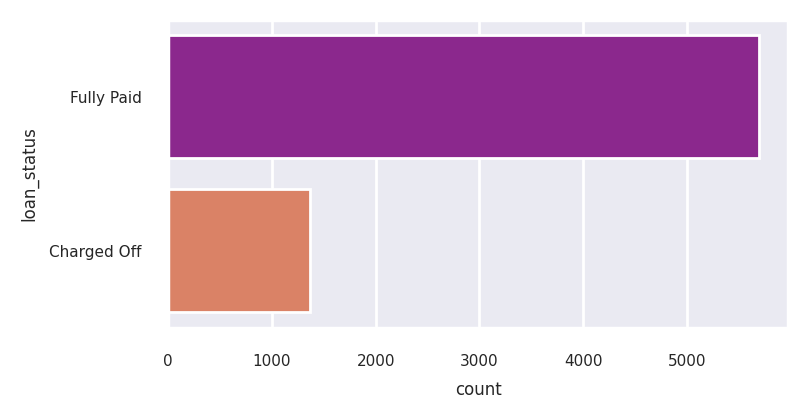

count           7062
unique             2
top       Fully Paid
freq            5691
Name: loan_status, dtype: object


Univariate analysis for feature: purpose


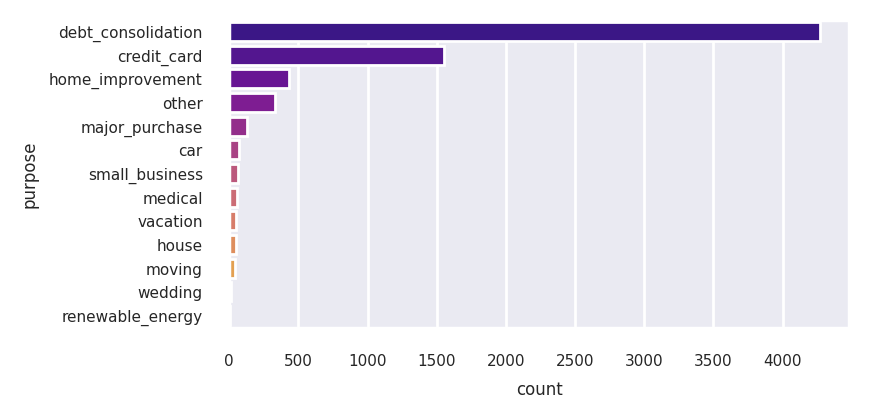

count                   7062
unique                    13
top       debt_consolidation
freq                    4269
Name: purpose, dtype: object


Univariate analysis for feature: initial_list_status


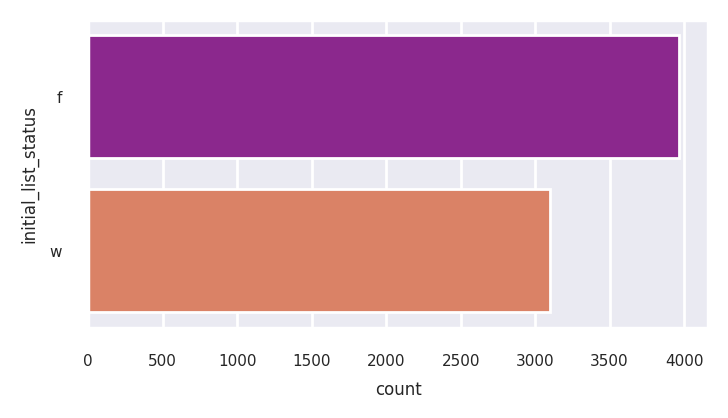

count     7062
unique       2
top          f
freq      3964
Name: initial_list_status, dtype: object


Univariate analysis for feature: application_type


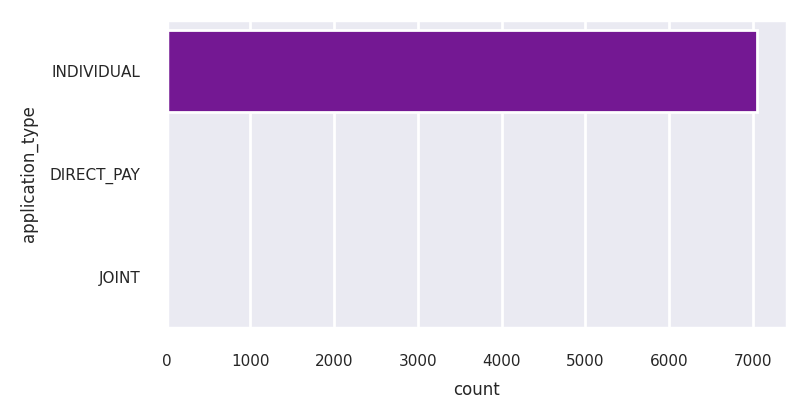

count           7062
unique             3
top       INDIVIDUAL
freq            7050
Name: application_type, dtype: object


Univariate analysis for feature: mort_acc


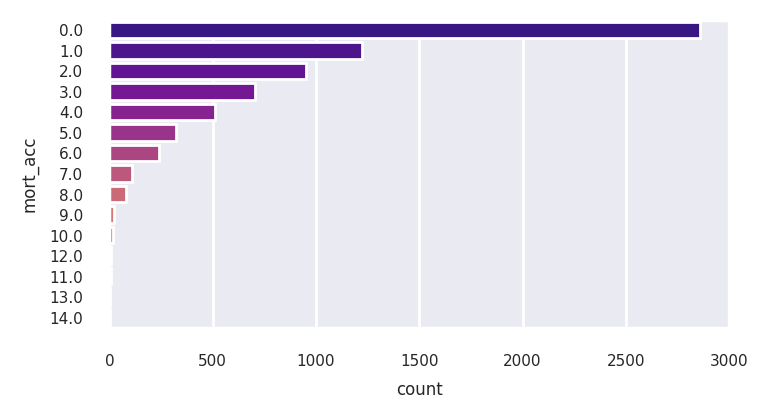

count     7062.0
unique      15.0
top          0.0
freq      2858.0
Name: mort_acc, dtype: float64


Univariate analysis for feature: pub_rec_bankruptcies


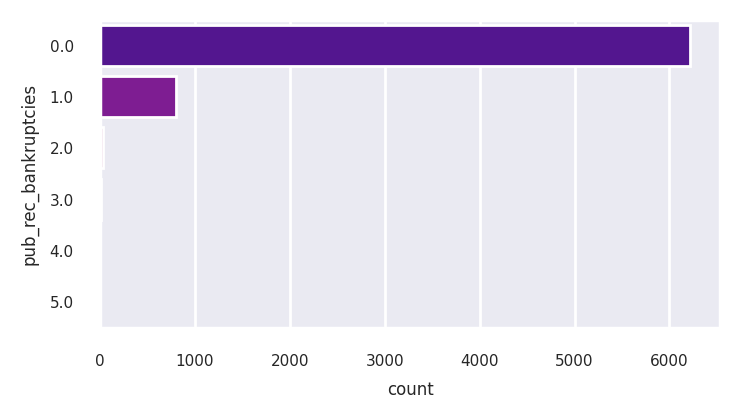

count     7062.0
unique       6.0
top          0.0
freq      6222.0
Name: pub_rec_bankruptcies, dtype: float64




In [26]:
for feature in cat:
    # Print the feature name
    print(f"Univariate analysis for feature: {feature}")

    # Plot the distribution of the feature
    plt.figure(figsize=(4, 2), dpi=200, edgecolor='black')
    sns.set(font_scale=0.5)
    sns.countplot(data_clean[feature],
                      order=data_clean[feature].value_counts().iloc[:].index,
                      palette='plasma')
    plt.show()

    # Print the descriptive statistics of the feature
    print(data_clean[feature].describe())
    print("\n")


Bi variate Analysis between the numerical features

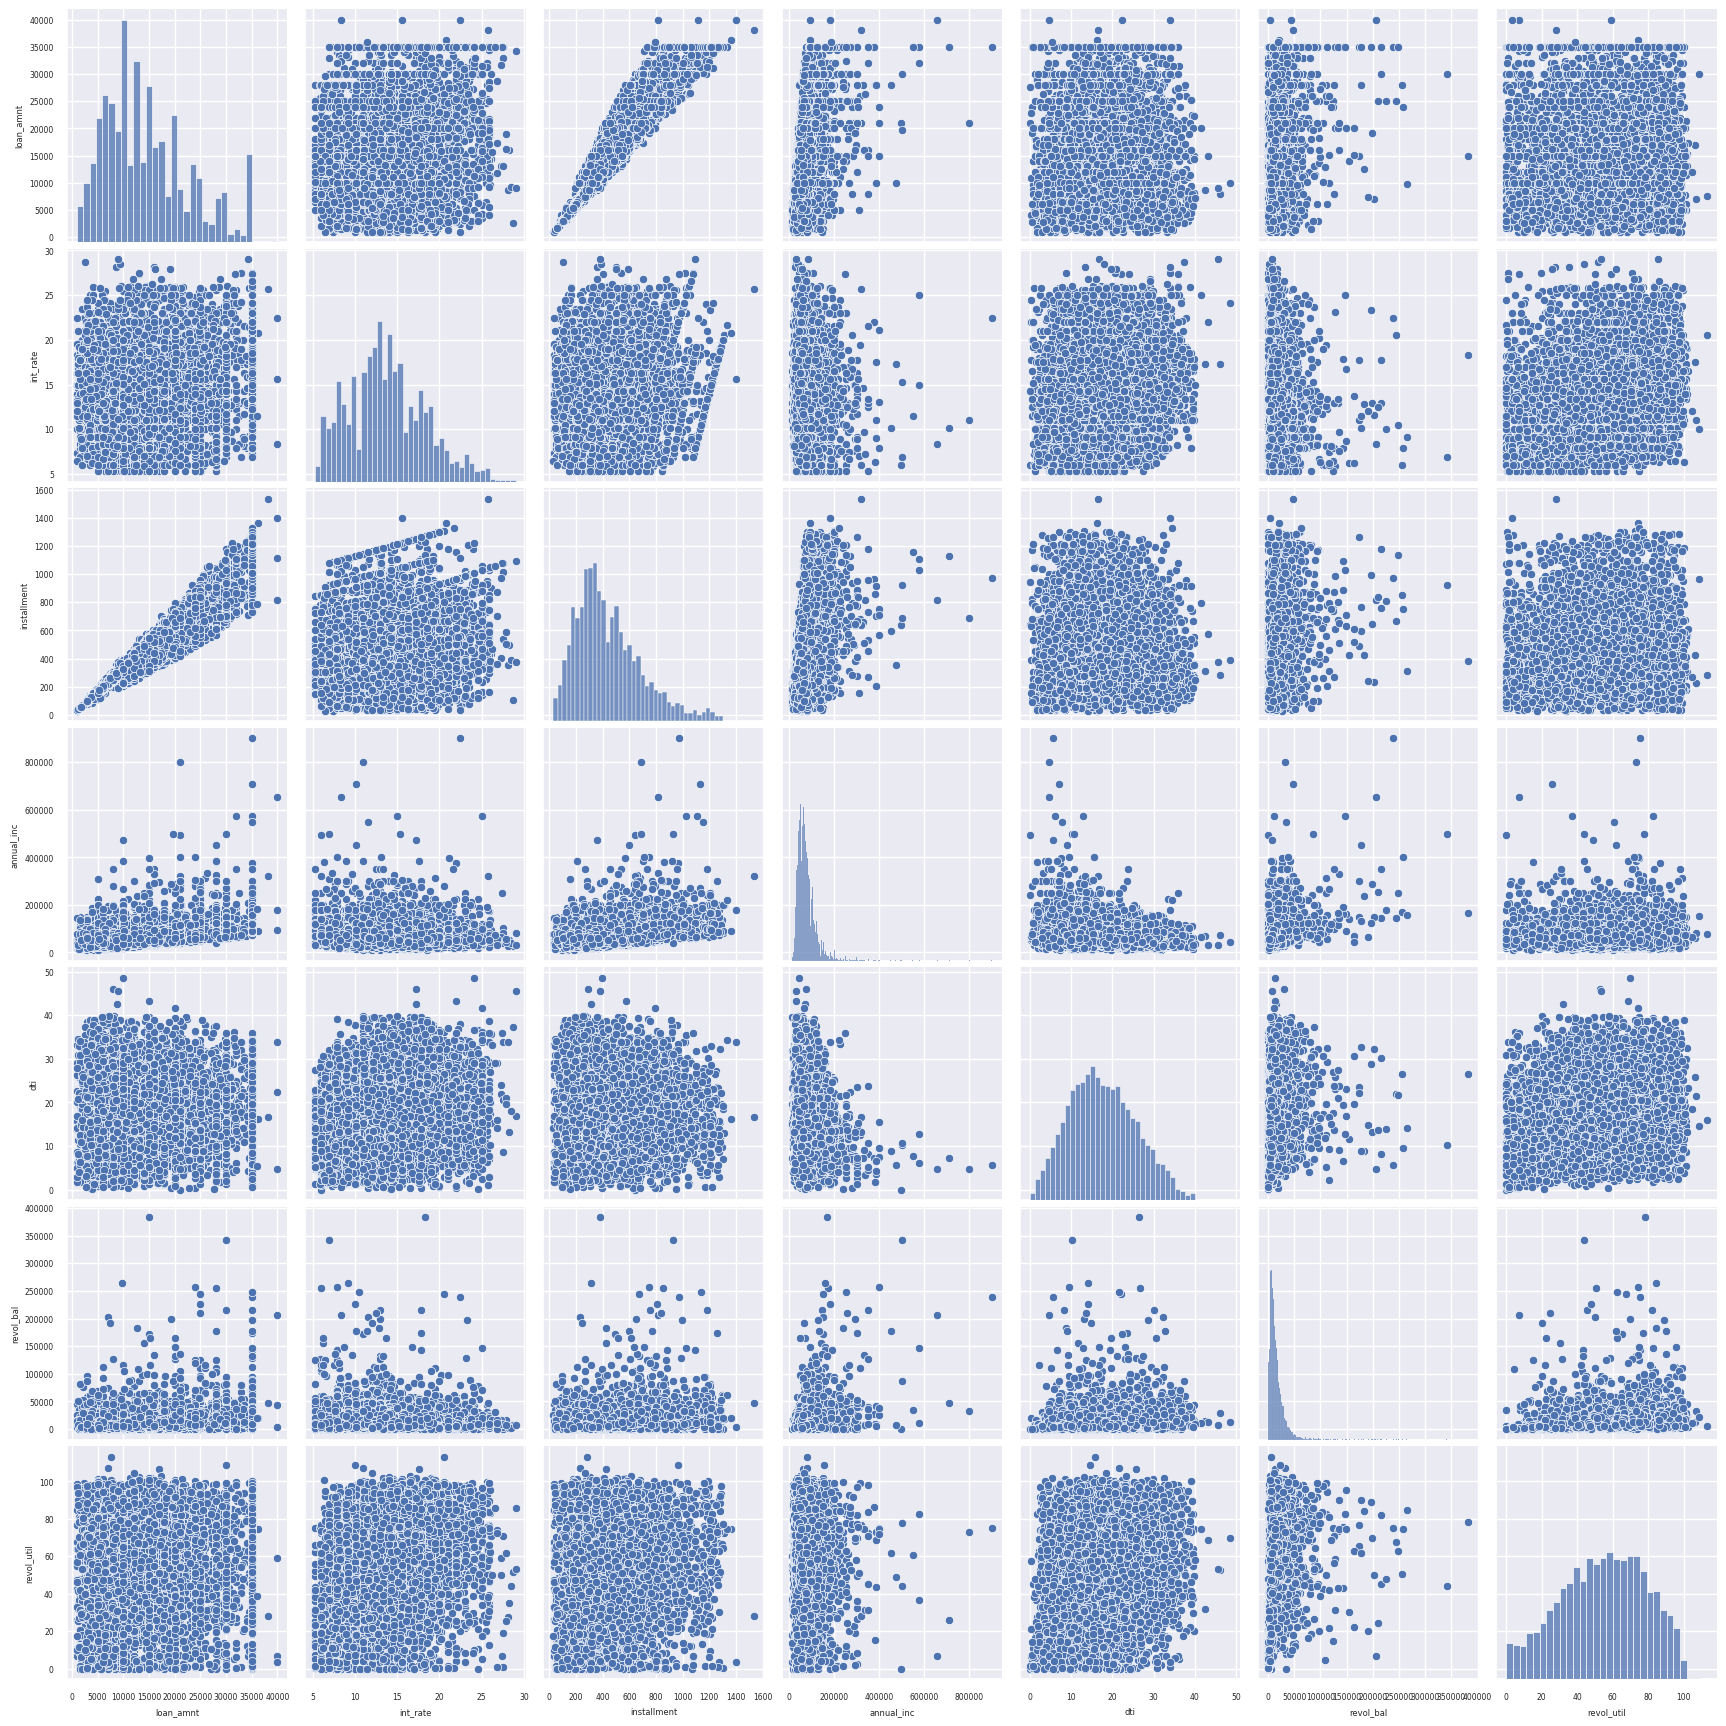

In [27]:
# for feature in numerical_features:
#     # Print the feature name
#     print(f"Univariate analysis for feature: {feature}")

#     # Plot the distribution of the feature
#     plt.figure(figsize=(4, 2), dpi=200, edgecolor='black')
#     sns.set(font_scale=0.5)
#     sns.displot(data_clean[feature], palette='plasma',kde=True,color='orange')
#     plt.show()

#     # Print the descriptive statistics of the feature
#     print(data_clean[feature].describe())
#     print("\n")


sns.pairplot(data_clean[numerical_features])

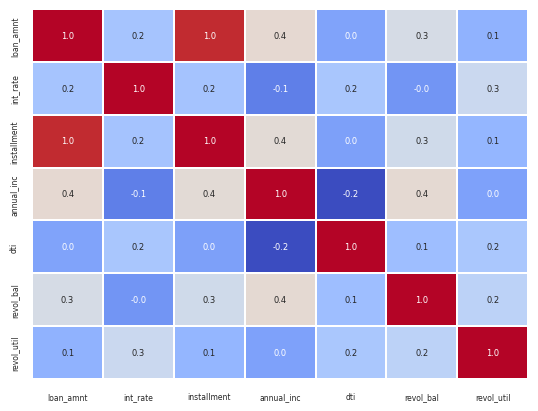

In [28]:
sns.heatmap(data_clean[numerical_features].corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

Observations
  - High correlation between the loan_amount and the installment. This could affect the models peformance as it is suspicious of causing multi colinearity

Analysis of features with predictor loan status

Outlier detection

In [29]:
data_clean.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

# Model Pre processing

Encoding features which are not numerical

1. emp_title
2. empt_length
3. address
4. applitcation type
5. home ownership
6. term
6. grade
7. sub grade
8. purpose
9. verification status
10. issue_d
11. title
12. initial list status
13. Loan Status

In [30]:
data_encode = data_clean.copy()

In [31]:
encode_columns = ['emp_title', 'emp_length','term',  'grade', 'sub_grade','home_ownership','verification_status', 'issue_d', 'loan_status', 'purpose',
            'title', 'initial_list_status', 'application_type', 'address']

data_to_be_encoded = data_encode[encode_columns]

cardinality_table = data_to_be_encoded.nunique().to_frame(name='nunique')

cardinality_table.sort_values('nunique')

,nunique
term,2
loan_status,2
initial_list_status,2
home_ownership,3
verification_status,3
application_type,3
grade,7
emp_length,11
purpose,13
sub_grade,35




1.   Term ,loan status and initial list_status can be label encodedd since they have only two values
2.   Home ownership, verification status and application type can be one hot encoded since they have very low cardinality (3)

3.  Since we are trying to predict the loan_status of a borrower it would seem unlikely that the address and emp_title would make an impact in the prediction so we can drop these two columns. However since emp_length is a measure of time it can still impact loan_status so we will retain it and encode it
4. Furthermore we can perform chi squared contingency test to prove the hypothesis above




In [32]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [33]:

contingency_columns = ['emp_title', 'emp_length','term',  'grade', 'sub_grade', 'issue_d',  'purpose',
            'title', 'initial_list_status',  'address','earliest_cr_line']

for column in contingency_columns:
  contingency_table = pd.crosstab(data_encode[column], data_encode['loan_status'])

  chi2, p, dof, expected = chi2_contingency(contingency_table)

  if p < 0.05:
      print(f"There is a statistically significant association between {column} and loan status.")
  else:
      print(f"There is no statistically significant association between {column} and loan status.")


There is no statistically significant association between emp_title and loan status.
There is no statistically significant association between emp_length and loan status.
There is a statistically significant association between term and loan status.
There is a statistically significant association between grade and loan status.
There is a statistically significant association between sub_grade and loan status.
There is a statistically significant association between issue_d and loan status.
There is a statistically significant association between purpose and loan status.
There is no statistically significant association between title and loan status.
There is no statistically significant association between initial_list_status and loan status.
There is no statistically significant association between address and loan status.
There is no statistically significant association between earliest_cr_line and loan status.


We can drop the columns with no significance to the loan status

In [34]:
data_encode = data_encode.drop(columns={'emp_title','emp_length','title','initial_list_status','address'},axis=1)
data_encode

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,INDIVIDUAL,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,5000.0,36 months,6.03,152.18,A,A1,RENT,72000.0,Not Verified,Nov-2013,...,8.88,Apr-2006,11.0,0.0,7384.0,61.5,15.0,INDIVIDUAL,0.0,0.0
8275,16000.0,60 months,21.98,441.73,E,E4,RENT,52000.0,Verified,Jun-2013,...,10.04,Jul-1984,6.0,1.0,4890.0,54.9,35.0,INDIVIDUAL,4.0,1.0
8277,5375.0,36 months,11.99,178.51,B,B3,OWN,55000.0,Source Verified,Dec-2013,...,22.87,May-1993,11.0,0.0,2447.0,27.2,45.0,INDIVIDUAL,0.0,0.0
8278,20000.0,36 months,11.67,661.14,B,B4,MORTGAGE,59000.0,Verified,Aug-2014,...,11.84,Oct-1996,14.0,0.0,24696.0,27.0,17.0,INDIVIDUAL,1.0,0.0


In [35]:
# X = data.drop(columns='loan_status')
# y = data['loan_status']
le_columns = ['term','loan_status']
le = LabelEncoder()

for column in le_columns:
    data_encode[column] = le.fit_transform(data_encode[column])

data_encode

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,0,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,INDIVIDUAL,0.0,0.0
1,8000.0,0,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,INDIVIDUAL,3.0,0.0
2,15600.0,0,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,INDIVIDUAL,0.0,0.0
3,7200.0,0,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,INDIVIDUAL,0.0,0.0
4,24375.0,1,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,INDIVIDUAL,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,5000.0,0,6.03,152.18,A,A1,RENT,72000.0,Not Verified,Nov-2013,...,8.88,Apr-2006,11.0,0.0,7384.0,61.5,15.0,INDIVIDUAL,0.0,0.0
8275,16000.0,1,21.98,441.73,E,E4,RENT,52000.0,Verified,Jun-2013,...,10.04,Jul-1984,6.0,1.0,4890.0,54.9,35.0,INDIVIDUAL,4.0,1.0
8277,5375.0,0,11.99,178.51,B,B3,OWN,55000.0,Source Verified,Dec-2013,...,22.87,May-1993,11.0,0.0,2447.0,27.2,45.0,INDIVIDUAL,0.0,0.0
8278,20000.0,0,11.67,661.14,B,B4,MORTGAGE,59000.0,Verified,Aug-2014,...,11.84,Oct-1996,14.0,0.0,24696.0,27.0,17.0,INDIVIDUAL,1.0,0.0


In [36]:
one_hot_data = data_encode.copy()
one_hot_columns = ['home_ownership','verification_status','application_type']

one_hot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity

encoded_data = one_hot_encoder.fit_transform(data_encode[one_hot_columns])

encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(one_hot_columns))

encoded_df.reset_index(inplace=True)

one_hot_data.reset_index(inplace=True)
one_hot_data

final_data = pd.concat([encoded_df, one_hot_data], axis=1)
final_data.drop(columns=['index'], axis=1, inplace=True)
final_data
data_encode = final_data.copy()
data_encode = data_encode.drop(columns=['home_ownership','verification_status','application_type'],axis=1)

data_encode

,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,loan_amnt,term,int_rate,installment,...,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,0.0,1.0,0.0,0.0,1.0,0.0,10000.0,0,11.44,329.48,...,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,8000.0,0,11.99,265.68,...,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,15600.0,0,10.49,506.97,...,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,7200.0,0,6.49,220.65,...,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,24375.0,1,17.27,609.33,...,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7057,0.0,1.0,0.0,0.0,1.0,0.0,5000.0,0,6.03,152.18,...,credit_card,8.88,Apr-2006,11.0,0.0,7384.0,61.5,15.0,0.0,0.0
7058,0.0,1.0,0.0,1.0,1.0,0.0,16000.0,1,21.98,441.73,...,moving,10.04,Jul-1984,6.0,1.0,4890.0,54.9,35.0,4.0,1.0
7059,1.0,0.0,1.0,0.0,1.0,0.0,5375.0,0,11.99,178.51,...,debt_consolidation,22.87,May-1993,11.0,0.0,2447.0,27.2,45.0,0.0,0.0
7060,0.0,0.0,0.0,1.0,1.0,0.0,20000.0,0,11.67,661.14,...,home_improvement,11.84,Oct-1996,14.0,0.0,24696.0,27.0,17.0,1.0,0.0


In [37]:
data_encode.columns

Index(['home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT', 'loan_amnt',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'annual_inc',
       'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [38]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.9 MB/s eta 0:00:00


In [39]:
import pandas as pd
import category_encoders as ce

# Define the target encoder
target_encoder = ce.TargetEncoder(cols=['grade', 'purpose', 'sub_grade', 'issue_d','earliest_cr_line'], drop_invariant=True)

# Fit the target encoder on the data
target_encoder.fit(data_encode.drop('loan_status', axis=1), data_encode['loan_status'])

# Transform the data using the target encoder
data_encoded = target_encoder.transform(data_encode.drop('loan_status', axis=1))

# Concatenate the encoded features with the loan_status column
data_encoded = pd.concat([data_encoded, data_encode['loan_status']], axis=1)

data_encoded

,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,loan_amnt,term,int_rate,installment,...,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_status
0,0.0,1.0,0.0,0.0,1.0,0.0,10000.0,0,11.44,329.48,...,26.24,0.809423,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,1.0,0.0,8000.0,0,11.99,265.68,...,22.05,0.824429,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1
2,0.0,1.0,1.0,0.0,1.0,0.0,15600.0,0,10.49,506.97,...,12.79,0.818229,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1
3,0.0,1.0,0.0,0.0,1.0,0.0,7200.0,0,6.49,220.65,...,2.60,0.831877,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1
4,0.0,0.0,0.0,1.0,1.0,0.0,24375.0,1,17.27,609.33,...,33.95,0.744855,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7057,0.0,1.0,0.0,0.0,1.0,0.0,5000.0,0,6.03,152.18,...,8.88,0.788348,11.0,0.0,7384.0,61.5,15.0,0.0,0.0,1
7058,0.0,1.0,0.0,1.0,1.0,0.0,16000.0,1,21.98,441.73,...,10.04,0.712389,6.0,1.0,4890.0,54.9,35.0,4.0,1.0,0
7059,1.0,0.0,1.0,0.0,1.0,0.0,5375.0,0,11.99,178.51,...,22.87,0.858690,11.0,0.0,2447.0,27.2,45.0,0.0,0.0,1
7060,0.0,0.0,0.0,1.0,1.0,0.0,20000.0,0,11.67,661.14,...,11.84,0.801069,14.0,0.0,24696.0,27.0,17.0,1.0,0.0,1


# **Model Training**

Scaling

In [40]:
ltd_data = data_encoded.copy()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(data_encoded),columns = data_encoded.columns)

df.head()

,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,loan_amnt,term,int_rate,installment,...,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_status
0,0.0,1.0,0.0,0.0,1.0,0.0,0.230769,0.0,0.258555,0.198801,...,0.540362,0.582752,0.348837,0.0,0.095041,0.369912,0.217822,0.000000,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.179487,0.0,0.281791,0.156357,...,0.454077,0.632467,0.372093,0.0,0.052607,0.471681,0.237624,0.214286,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.374359,0.0,0.218420,0.316879,...,0.263386,0.611926,0.279070,0.0,0.031325,0.815929,0.227723,0.000000,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.158974,0.0,0.049430,0.126400,...,0.053542,0.657143,0.116279,0.0,0.014300,0.190265,0.099010,0.000000,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.599359,1.0,0.504858,0.384976,...,0.699135,0.368830,0.279070,0.0,0.064244,0.617699,0.396040,0.071429,0.0,0.0


Model Split

In [41]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['loan_status'],axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [42]:
X_train

,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,loan_amnt,term,int_rate,installment,...,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
1351,0.0,0.0,0.0,1.0,1.0,0.0,0.794872,1.0,0.338403,0.467595,...,0.603411,0.425041,0.633328,0.302326,0.111111,0.028842,0.222124,0.257426,0.142857,0.0
2048,0.0,0.0,0.0,1.0,1.0,0.0,0.261538,1.0,0.281791,0.145321,...,0.693290,0.213344,0.774941,0.255814,0.000000,0.025320,0.115929,0.168317,0.000000,0.0
6236,0.0,1.0,1.0,0.0,1.0,0.0,0.351282,1.0,0.662019,0.244126,...,0.603411,0.495675,0.427790,0.348837,0.000000,0.023524,0.751327,0.178218,0.000000,0.0
3544,0.0,1.0,1.0,0.0,1.0,0.0,0.128205,0.0,0.599916,0.126979,...,0.375931,0.500000,0.898457,0.069767,0.000000,0.019795,0.859292,0.019802,0.000000,0.0
2441,0.0,1.0,0.0,0.0,1.0,0.0,0.384615,1.0,0.339248,0.223715,...,0.693290,0.132002,0.558864,0.441860,0.000000,0.019437,0.510619,0.207921,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.0,0.0,0.0,1.0,1.0,0.0,0.544231,0.0,0.338403,0.480148,...,0.728076,0.380972,0.311391,0.372093,0.111111,0.039442,0.283186,0.326733,0.142857,0.2
5192,0.0,1.0,0.0,0.0,1.0,0.0,0.282051,0.0,0.162653,0.234107,...,0.603411,0.205313,0.461552,0.093023,0.000000,0.019119,0.394690,0.138614,0.000000,0.0
3980,0.0,1.0,0.0,0.0,1.0,0.0,0.153846,0.0,0.324039,0.136499,...,0.693290,0.167010,0.476627,0.093023,0.000000,0.014564,0.616814,0.059406,0.000000,0.0
235,0.0,0.0,1.0,0.0,1.0,0.0,0.179487,0.0,0.302915,0.157635,...,0.603411,0.430601,0.427790,0.209302,0.000000,0.021248,0.413274,0.118812,0.071429,0.0


In [43]:
y_train

1351    1.0
2048    1.0
6236    1.0
3544    1.0
2441    0.0
       ... 
905     0.0
5192    1.0
3980    0.0
235     1.0
5157    1.0
Name: loan_status, Length: 4943, dtype: float64

In [44]:
X_test

,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,loan_amnt,term,int_rate,installment,...,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
3682,0.0,0.0,1.0,0.0,1.0,0.0,0.620513,1.0,0.574567,0.413762,...,0.603411,0.247117,0.898457,0.209302,0.000000,0.091325,0.552212,0.356436,0.142857,0.0
4051,1.0,0.0,1.0,0.0,1.0,0.0,0.487179,1.0,0.556401,0.321037,...,0.693290,0.641680,0.530684,0.325581,0.000000,0.053057,0.781416,0.198020,0.000000,0.0
5570,0.0,0.0,1.0,0.0,1.0,0.0,0.230769,0.0,0.029996,0.182090,...,0.693290,0.240321,0.710825,0.372093,0.000000,0.012460,0.055752,0.485149,0.285714,0.0
2459,1.0,0.0,0.0,0.0,1.0,0.0,0.358974,0.0,0.151246,0.296475,...,0.693290,0.473023,0.662193,0.534884,0.000000,0.069930,0.487611,0.465347,0.142857,0.0
6313,0.0,1.0,1.0,0.0,1.0,0.0,0.125641,0.0,0.187579,0.105824,...,0.693290,0.124794,0.524359,0.325581,0.000000,0.033821,0.385841,0.188119,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4080,0.0,0.0,0.0,1.0,1.0,0.0,0.078205,0.0,0.869033,0.088008,...,0.603411,0.454901,0.492235,0.139535,0.000000,0.005890,0.738938,0.267327,0.285714,0.0
5632,0.0,0.0,1.0,0.0,1.0,0.0,0.358974,0.0,0.054922,0.286004,...,0.693290,0.353789,0.662879,0.348837,0.000000,0.059423,0.415044,0.277228,0.142857,0.0
4631,0.0,1.0,1.0,0.0,1.0,0.0,0.141667,0.0,0.476130,0.133492,...,0.603411,0.686573,0.446120,0.255814,0.000000,0.063881,0.407965,0.198020,0.142857,0.0
7003,0.0,0.0,0.0,0.0,1.0,0.0,0.138462,0.0,0.311365,0.122435,...,0.375931,0.206549,0.499239,0.232558,0.222222,0.014848,0.166372,0.386139,0.142857,0.2


In [45]:
y_test

3682    0.0
4051    1.0
5570    1.0
2459    1.0
6313    1.0
       ... 
4080    1.0
5632    1.0
4631    0.0
7003    1.0
3961    1.0
Name: loan_status, Length: 2119, dtype: float64

In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

# **Model Testing**

In [47]:
y_pred = model.predict(X_test)

In [48]:
model.score(X_test,y_test)

0.8211420481359132

In [49]:
result_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred,
    'error': y_test==y_pred
})
result_df

,y_test,y_pred,error
3682,0.0,1.0,False
4051,1.0,1.0,True
5570,1.0,1.0,True
2459,1.0,1.0,True
6313,1.0,1.0,True
...,...,...,...
4080,1.0,1.0,True
5632,1.0,1.0,True
4631,0.0,1.0,False
7003,1.0,1.0,True


In [50]:
model.coef_[0]

array([-0.23096782, -0.27578104, -0.18366295, -0.01802882,  0.14693084,
        0.43548525, -0.08436071, -0.47956541, -0.37760524, -0.11310599,
        0.31561203,  1.33897035,  0.97455494,  1.3585278 ,  0.38525356,
       -1.03890837,  2.89444531, -0.0640123 ,  0.0195853 ,  0.60313539,
       -0.41301442,  0.37851927,  0.7353957 , -0.44629593])

In [51]:
model.intercept_

array([-1.10344056])

In [52]:
coef_df = pd.DataFrame({
    'features': X_train.columns,
    'coef': model.coef_[0] #coef_ is 2d
})

coef_df = coef_df.sort_values(by='coef', ascending=False)

print(coef_df)

                               features      coef
16                     earliest_cr_line  2.894445
13                              issue_d  1.358528
11                            sub_grade  1.338970
12                           annual_inc  0.974555
22                             mort_acc  0.735396
19                            revol_bal  0.603135
5                application_type_JOINT  0.435485
14                              purpose  0.385254
21                            total_acc  0.378519
10                                grade  0.315612
4           application_type_INDIVIDUAL  0.146931
18                              pub_rec  0.019585
3          verification_status_Verified -0.018029
17                             open_acc -0.064012
6                             loan_amnt -0.084361
9                           installment -0.113106
2   verification_status_Source Verified -0.183663
0                    home_ownership_OWN -0.230968
1                   home_ownership_RENT -0.275781


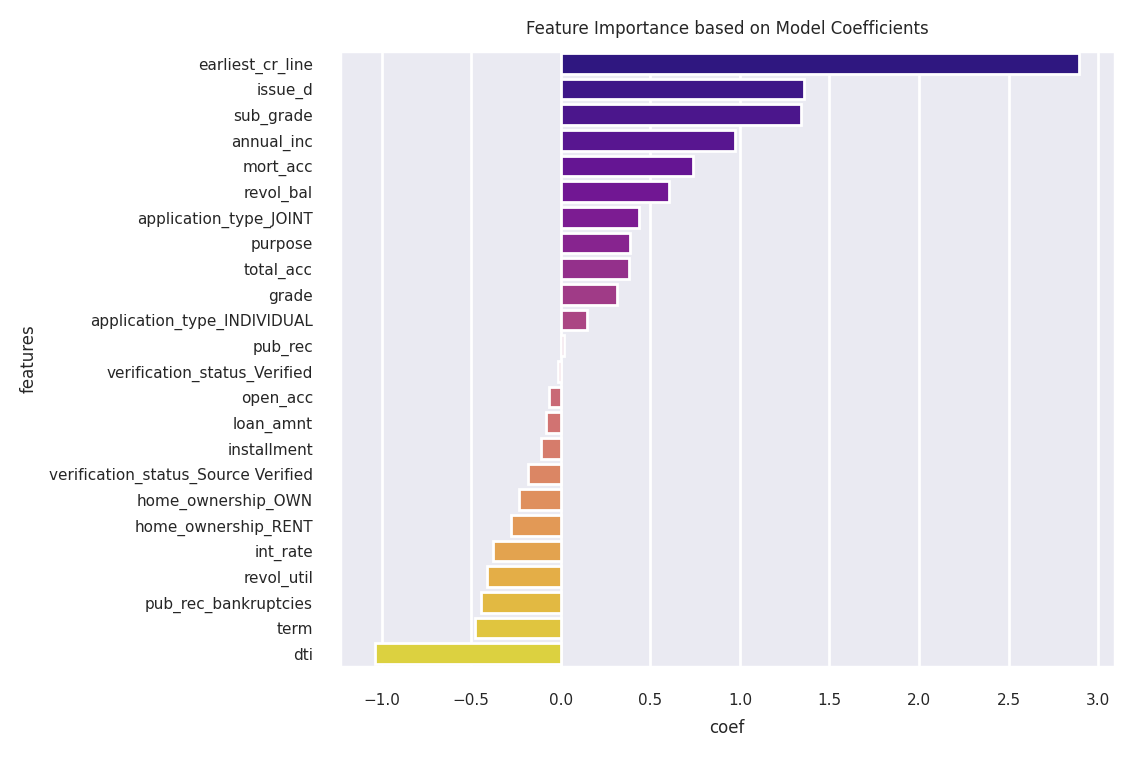

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4), dpi=200)
sns.set(context='notebook',font_scale=0.5,style="darkgrid")
ax = sns.barplot(x='coef', y='features', data=coef_df,palette='plasma')
ax.set_title("Feature Importance based on Model Coefficients")
plt.show()


**Observations and inferences from feature coefficient graph**



1. Financial Stability Indicators: Factors like annual_inc, mort_acc, and total_acc suggest that financial stability and credit experience are important for repayment likelihood.


2. Credit History: Positive factors such as earliest_cr_line and negative factors such as revol_util emphasize the importance of a borrower’s credit history.

3. Loan Characteristics: Higher loan_amnt, higher int_rate, and longer term increase the risk of non-repayment.

4. Verification and Home Ownership: Verification status and home ownership types have less clear impacts, suggesting the need for further investigation.
Overall, the model highlights the importance of both borrower financial health and specific loan characteristics in predicting loan repayment behavior.
  *   Joint application type, are likely to pay their loan vs individual
  *   Applicants who own are slightly more likely than applicatns who rent house/mortgage (owners have slightly lesser negative coefficient)




# **Model Evaluation**

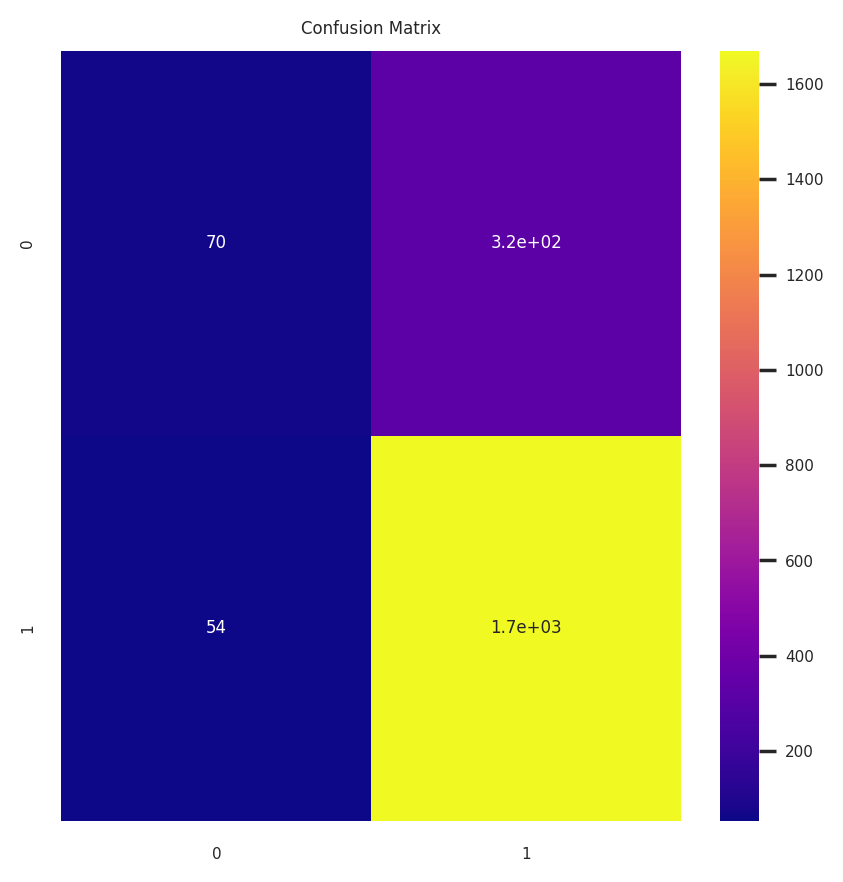

In [60]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 5), dpi=200)
sns.set(context='notebook', font_scale=0.5, style="whitegrid")
ax = sns.heatmap(cm, annot=True, cmap='plasma')
ax.set_title("Confusion Matrix")
plt.show()


In [61]:
from sklearn.metrics import classification_report

# Get the classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)


              precision    recall  f1-score   support

         0.0       0.56      0.18      0.27       395
         1.0       0.84      0.97      0.90      1724

    accuracy                           0.82      2119
   macro avg       0.70      0.57      0.58      2119
weighted avg       0.79      0.82      0.78      2119





1.   The model performs well in predicting the positive class (1.0) but poorly in predicting the negative class (0.0). This discrepancy is evident in the precision, recall, and F1-scores for each class.
2. The high recall and precision for class 1.0 indicate that the model is highly effective at identifying true positive cases and has few false positives.
3. The low recall for class 0.0 suggests that the model is missing a significant number of actual negative cases, leading to a high number of false negatives.
4. The overall accuracy of 82% is fairly high, but the imbalance in class performance highlights a potential issue with class imbalance or a bias towards the positive class.



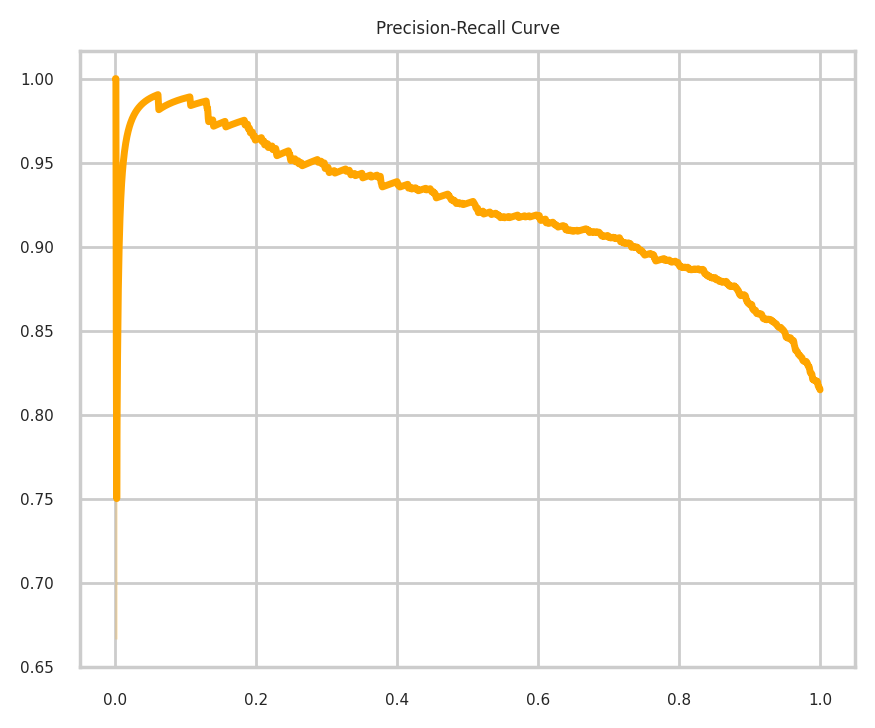

In [62]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot the precision-recall curve
plt.figure(figsize=(5, 4), dpi=200)
sns.set(context='notebook', font_scale=0.5, style="whitegrid")
ax = sns.lineplot(x=recall, y=precision, linewidth=2.5, color='orange')
ax.set_title("Precision-Recall Curve")
plt.show()



**Observations**

1.   High Initial Precision and Recall: At the beginning (left side), the precision is very high, close to 1.0, which indicates that almost all predicted positives are true positives. The recall is also high, suggesting that most actual positives are being captured by the model.

2. Trade-off Between Precision and Recall: As recall increases, precision starts to decrease. This is typical in precision-recall curves, as capturing more actual positives often comes at the cost of including more false positives.

3. Performance Decline: Towards the right side, the precision significantly drops as recall increases. This indicates that at higher thresholds, the model captures more true positives but also a substantial number of false positives, reducing precision.

4. Overall, the model appears to perform well initially but struggles to maintain high precision as recall increases. This suggests that the model might be more useful in scenarios where a high precision is required, and the cost of missing some true positives is acceptable.



**Tradeoff Questions:**
1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.



    1.   Increase the decision threshold: Raising the threshold for classifying a loan as default can increase precision,
     meaning fewer false positives.
    2.   However, this might reduce recall, meaning some actual defaulters may be missed.


Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone



    1. Lower the decision threshold: Lowering the threshold can increase recall, ensuring that most potential defaulters are identified.
    2. This is safer in preventing NPAs but may result in more false positives.

